In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('enron_email_20_percent.csv')

In [3]:
data.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,403470,<117238.1075846810566.JavaMail.evans@thyme>,2000-12-11 09:22:00,frozenset({'susan.scott@enron.com'}),frozenset({'alicia.perkins@enron.com'}),Re: Travel,Susan M Scott,Alicia Perkins,katyhester@hotmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,130904,<12689165.1075853747639.JavaMail.evans@thyme>,2000-03-09 10:00:00,frozenset({'scott.goodell@enron.com'}),frozenset({'chris.germany@enron.com'}),Re: k#65403,Scott Goodell,Chris Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,217372,<12058190.1075856802090.JavaMail.evans@thyme>,2000-02-04 18:14:00,frozenset({'vince.kaminski@enron.com'}),frozenset({'vkaminski@aol.com'}),El Paso / ENA Deal Completely Terminated Now,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,376779,<1251997.1075857131869.JavaMail.evans@thyme>,2000-11-01 12:34:00,frozenset({'benjamin.rogers@enron.com'}),frozenset({'patty.donahue@chase.com'}),Re: FW: winnie_t,Benjamin Rogers,"""Donahue, Patty"" <Patty.Donahue@Chase.com> @ E...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,63707,<23661622.1075843051592.JavaMail.evans@thyme>,2000-11-29 15:43:00,frozenset({'jeff.dasovich@enron.com'}),frozenset({'joseph.alamo@enron.com'}),Re: Address Information,Jeff Dasovich,Joseph Alamo,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103480 entries, 0 to 103479
Data columns (total 52 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103480 non-null  int64  
 1   Message-ID      103480 non-null  object 
 2   Date            103480 non-null  object 
 3   From            103480 non-null  object 
 4   To              99165 non-null   object 
 5   Subject         99656 non-null   object 
 6   X-From          103476 non-null  object 
 7   X-To            101679 non-null  object 
 8   X-cc            25663 non-null   object 
 9   X-bcc           39 non-null      object 
 10  X-Folder        103476 non-null  object 
 11  X-Origin        103476 non-null  object 
 12  X-FileName      102624 non-null  object 
 13  content         103246 non-null  object 
 14  user            103480 non-null  object 
 15  Cat_1_level_1   327 non-null     float64
 16  Cat_1_level_2   327 non-null     float64
 17  Cat_1_weig

In [5]:
data.describe()

,Unnamed: 0,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,...,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight
count,103480.000000,327.0,327.000000,327.000000,289.000000,289.000000,289.000000,232.000000,232.000000,232.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,258428.879928,1.0,2.581040,1.651376,2.003460,3.069204,1.591696,2.327586,3.982759,1.538793,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,149261.811705,0.0,1.916671,0.496172,0.530319,3.196469,0.513093,0.585183,3.618095,0.524924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,129517.250000,1.0,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,258514.500000,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,387474.250000,1.0,4.000000,2.000000,2.000000,4.000000,2.000000,3.000000,6.000000,2.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,517400.000000,1.0,8.000000,3.000000,4.000000,13.000000,3.000000,4.000000,13.000000,4.000000,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data['Date']

0         2000-12-11 09:22:00
1         2000-03-09 10:00:00
2         2000-02-04 18:14:00
3         2000-11-01 12:34:00
4         2000-11-29 15:43:00
                 ...         
103475    1999-09-09 17:51:00
103476    2001-05-03 13:34:00
103477    2000-08-21 17:33:00
103478    2001-01-17 18:11:00
103479    2001-04-13 10:43:00
Name: Date, Length: 103480, dtype: object

In [7]:
data['Date'][0].split()[1]

'09:22:00'

In [8]:
import seaborn as sns

# Check missing data

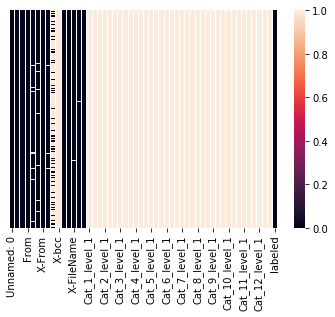

In [11]:
sns.heatmap(data.isnull(),yticklabels=False)

### As data in 'cat_levels' columns is missing, we will drop those!

In [12]:
data.drop(['Cat_1_level_1','Cat_2_level_1','Cat_3_level_1','Cat_4_level_1','Cat_5_level_1','Cat_6_level_1','Cat_7_level_1','Cat_8_level_1','Cat_9_level_1','Cat_10_level_1','Cat_11_level_1','Cat_12_level_1'], axis = 1 , inplace=True)

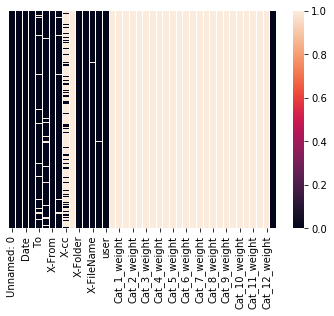

In [13]:
sns.heatmap(data.isnull(),yticklabels=False)

In [14]:
data.drop(['Cat_1_weight','Cat_2_weight','Cat_3_weight','Cat_4_weight','Cat_5_weight','Cat_6_weight','Cat_7_weight','Cat_8_weight','Cat_9_weight','Cat_10_weight','Cat_11_weight','Cat_12_weight'],axis=1,inplace=True)

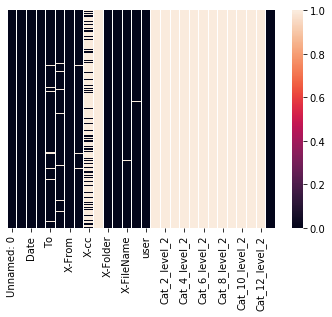

In [15]:
sns.heatmap(data.isnull(),yticklabels=False)

In [16]:
data.drop(['Cat_2_level_2','Cat_4_level_2','Cat_6_level_2','Cat_8_level_2','Cat_10_level_2','Cat_12_level_2'],axis=1,inplace=True)

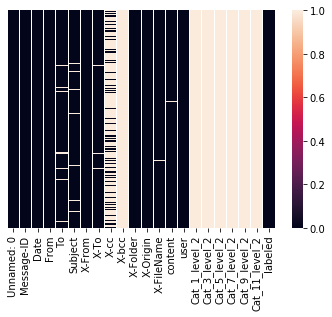

In [17]:
sns.heatmap(data.isnull(),yticklabels=False)

In [19]:
data.drop(['Cat_1_level_2','Cat_3_level_2','Cat_5_level_2','Cat_7_level_2','Cat_9_level_2','Cat_11_level_2'],axis=1,inplace=True)

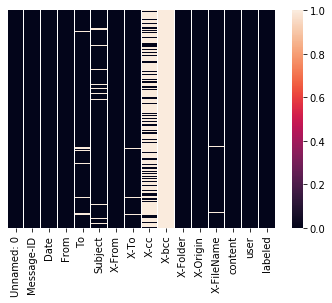

In [20]:
sns.heatmap(data.isnull(),yticklabels=False)

#### Huh! A lot of dropping in data, still 1 more to go! 

In [22]:
data.drop(['X-bcc'],axis=1,inplace=True)

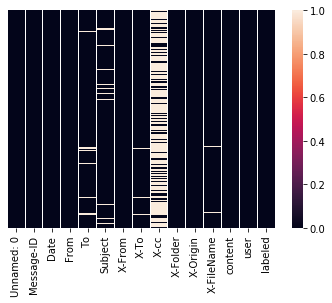

In [23]:
sns.heatmap(data.isnull(),yticklabels=False)

0                   frozenset({'alicia.perkins@enron.com'})
1                    frozenset({'chris.germany@enron.com'})
2                          frozenset({'vkaminski@aol.com'})
3                    frozenset({'patty.donahue@chase.com'})
4                     frozenset({'joseph.alamo@enron.com'})
                                ...                        
103475              frozenset({'ferazzi@emrecruiting.com'})
103476    frozenset({'james.steffes@enron.com', 'richard...
103477             frozenset({'martin.penkwitz@enron.com'})
103478           frozenset({'victor.guggenheim@enron.com'})
103479                  frozenset({'pete.davis@enron.com'})
Name: To, Length: 103480, dtype: object

0                                    katyhester@hotmail.com
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
103475                                                  NaN
103476                                      Linda Robertson
103477                                                  NaN
103478                                                  NaN
103479    bert.meyers@enron.com, bill.williams.III@enron...
Name: X-cc, Length: 103480, dtype: object